In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Import Data
try:
    df = pd.read_csv("Data/Top_Anime_data.csv")
except Exception as e:
    print(f"Error import Data str{e}")
df.head()


,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,...,Premiered,Broadcast,Producers,Licensors,Studios,Source,Genres,Demographic,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,...,Fall 2023,Fridays at 23:00 (JST),"Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,...,Spring 2009,Sundays at 17:00 (JST),"Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",ShounenShounen,24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,...,Spring 2011,Wednesdays at 02:05 (JST),"Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",NaN,24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,...,Spring 2015,Wednesdays at 18:00 (JST),"TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",ShounenShounen,24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,...,Spring 2019,Mondays at 00:10 (JST),"Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",ShounenShounen,23 min. per ep.,R - 17+ (violence & profanity)


## **Data Wrangling:**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Score        1000 non-null   float64
 1   Popularity   1000 non-null   int64  
 2   Rank         1000 non-null   int64  
 3   Members      1000 non-null   int64  
 4   Description  1000 non-null   object 
 5   Synonyms     709 non-null    object 
 6   Japanese     999 non-null    object 
 7   English      859 non-null    object 
 8   Type         1000 non-null   object 
 9   Episodes     1000 non-null   object 
 10  Status       1000 non-null   object 
 11  Aired        1000 non-null   object 
 12  Premiered    569 non-null    object 
 13  Broadcast    569 non-null    object 
 14  Producers    1000 non-null   object 
 15  Licensors    1000 non-null   object 
 16  Studios      1000 non-null   object 
 17  Source       1000 non-null   object 
 18  Genres       771 non-null    object 
 19  Demogra

### **----Handle Missing values:**


In [4]:
df.isnull().sum()

Score            0
Popularity       0
Rank             0
Members          0
Description      0
Synonyms       291
Japanese         1
English        141
Type             0
Episodes         0
Status           0
Aired            0
Premiered      431
Broadcast      431
Producers        0
Licensors        0
Studios          0
Source           0
Genres         229
Demographic    479
Duration         0
Rating           0
dtype: int64

- **Synonyms, Japanese, English, Premiered, Broadcast, Genres, Demographic:** For these columns with a significant number of null values, removing or replacing them might not be the best option.
- **Premiered, Broadcast, Demographic:** These columns are not important for my analysis, so considering them as unnecessary columns and just dropping them will be a `good` option.

In [5]:
# Remove unnecessary columns:
df = df.drop(columns=['Premiered', 'Broadcast', 'Demographic'])

In [6]:
columns = df.columns
for column in columns:
    print(f"{column}: {df[column].nunique()}")

Score: 121
Popularity: 1000
Rank: 1000
Members: 481
Description: 999
Synonyms: 701
Japanese: 953
English: 856
Type: 6
Episodes: 84
Status: 2
Aired: 961
Producers: 641
Licensors: 90
Studios: 166
Source: 15
Genres: 237
Duration: 141
Rating: 5


## **EDA:**

**Detect & Remove OUtliers:**

In [7]:
df.describe()

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


<Axes: >

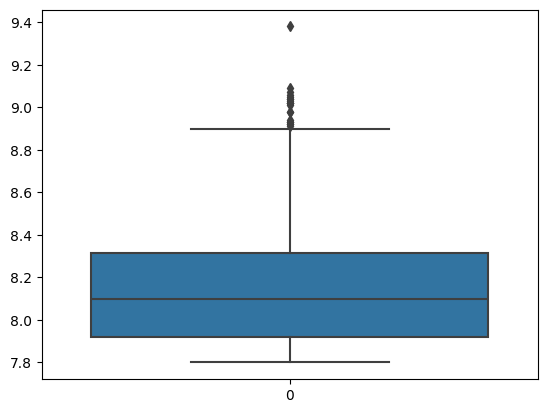

In [8]:
sns.boxplot(df['Score'])

<Axes: >

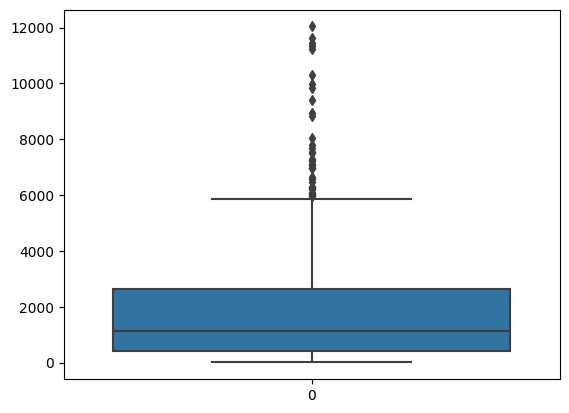

In [9]:
sns.boxplot(df['Popularity'])

<Axes: >

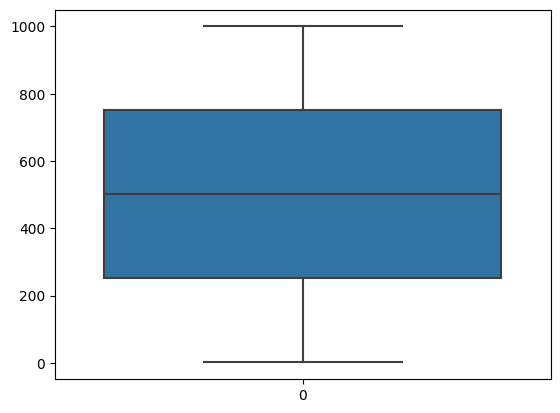

In [10]:
sns.boxplot(df['Rank'])

<Axes: >

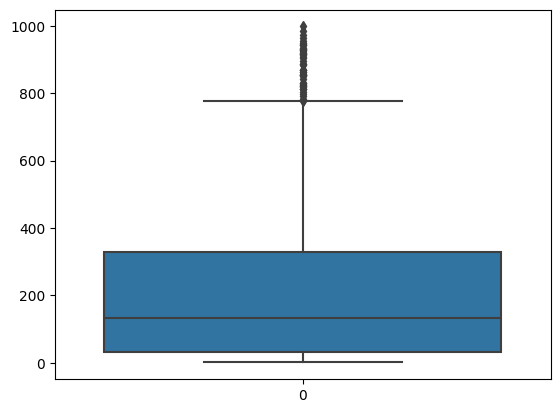

In [11]:
sns.boxplot(df['Members'])

- No outliers has been detected with Rank variable.
- Let's remove outliers from the other variables.

**Remove Outliers:**

In [12]:
df.describe()

,Score,Popularity,Rank,Members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,8.156580,1805.637000,500.500000,223.648000
std,0.284344,1888.308553,288.819436,246.288299
min,7.800000,1.000000,1.000000,1.000000
25%,7.920000,413.750000,250.750000,31.750000
50%,8.100000,1139.500000,500.500000,132.000000
75%,8.312500,2633.750000,750.250000,330.000000
max,9.380000,12043.000000,1000.000000,998.000000


- For `Score` the data seems to be normally distributed, with a relatively small devition of std compared to the mean, so I will use the z-score method for removing its outliers.
- For `Popularity` & `Members` the data seems to be skewed as indicated by the large difference between the mean and the median, & also for the std that's relatively large compared to the mean; Therefore, the IQR method may be suitable for outlier detection in these 2 variables.

In [14]:
# Score - using Z-score method

df['z-score'] = (df['Score'] - df['Score'].mean())/df['Score'].std()
'''
with 2:
    Upper Bound: 8.156580 + (2 * 0.284344) = 8.725268
    Lower Bound: 8.156580 - (2 * 0.284344) = 7.587892
with 3:
    Upper Bound: 8.156580 + (3 * 0.284344) = 8.725580
    Lower Bound: 8.156580 - (3 * 0.284344) = 7.587580
'''

'\nwith 2:\n    Upper Bound: 8.156580 + (2 * 0.284344) = 8.725268\n    Lower Bound: 8.156580 - (2 * 0.284344) = 7.587892\nwith 3:\n    Upper Bound: 8.156580 + (3 * 0.284344) = 8.725580\n    Lower Bound: 8.156580 - (3 * 0.284344) = 7.587580\n'

C:\Users\oo\AppData\Local\Temp\ipykernel_27052\3534520355.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Score'], shade=True)
c:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Score', ylabel='Density'>

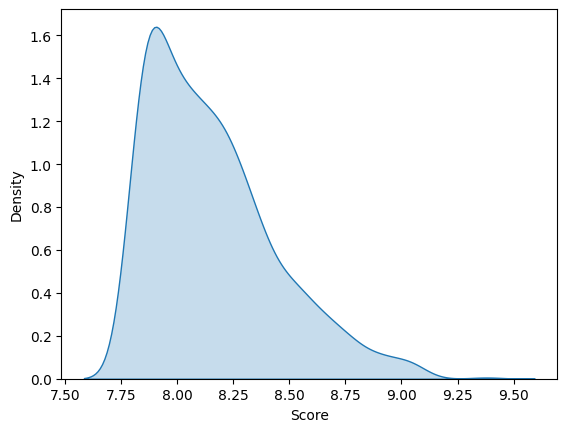

In [13]:
sns.kdeplot(df['Score'], shade=True)

Majority of data is in the range, so I will choose 2 for z-score method

In [16]:
outliers = df[(df['z-score'] > 2) | (df['z-score']<-2)]

In [17]:
cleaned_outliers_df = df.drop(outliers.index)
print("Original DataFrame's shape:")
print(df.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_df.shape)

Original DataFrame's shape:
(1000, 20)

DataFrame after removing outliers shape:
(950, 20)


C:\Users\oo\AppData\Local\Temp\ipykernel_27052\3718641875.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Popularity'], shade=True)
c:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Popularity', ylabel='Density'>

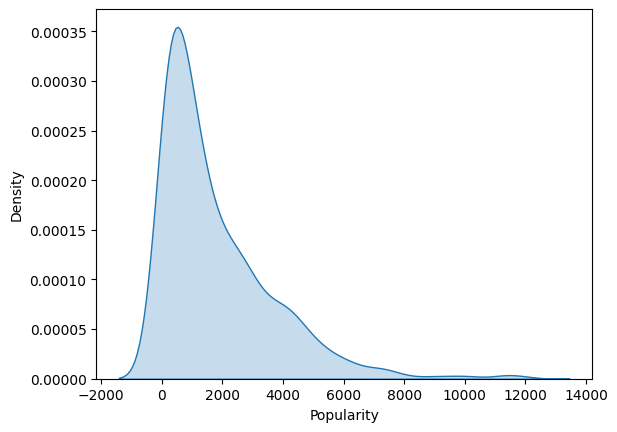

In [18]:
# Popularity - using IQR method
sns.kdeplot(df['Popularity'], shade=True)

In [22]:
Q1 = cleaned_outliers_df['Popularity'].quantile(0.25)
Q3 = cleaned_outliers_df['Popularity'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_outliers_df[(cleaned_outliers_df['Popularity'] < lower_bound) | (cleaned_outliers_df['Popularity'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

cleaned_outliers_dff = cleaned_outliers_df.drop(outliers.index)

print("Original DataFrame's shape:")
print(cleaned_outliers_df.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_dff.shape)


Lower Bound: -2916.25
Upper Bound: 5963.75
Original DataFrame's shape:
(950, 20)

DataFrame after removing outliers shape:
(912, 20)


C:\Users\oo\AppData\Local\Temp\ipykernel_27052\2976297411.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Members'], shade=True)
c:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Members', ylabel='Density'>

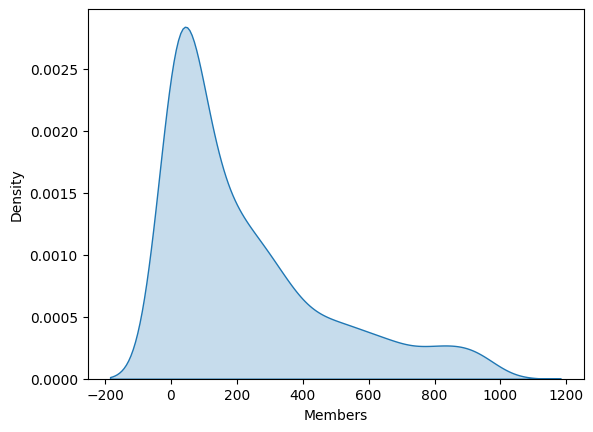

In [23]:
# Popularity - using IQR method
sns.kdeplot(df['Members'], shade=True)

In [25]:
Q1 = cleaned_outliers_dff['Members'].quantile(0.25)
Q3 = cleaned_outliers_dff['Members'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = cleaned_outliers_dff[(cleaned_outliers_dff['Members'] < lower_bound) | (cleaned_outliers_dff['Members'] > upper_bound)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

cleaned_outliers_dfff = cleaned_outliers_dff.drop(outliers.index)

print("Original DataFrame's shape:")
print(cleaned_outliers_dff.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_dfff.shape)


Lower Bound: -395.875
Upper Bound: 769.125
Original DataFrame's shape:
(912, 20)

DataFrame after removing outliers shape:
(857, 20)


In [26]:
cleaned_outliers_dfff.describe()

,Score,Popularity,Rank,Members,z-score
count,857.000000,857.000000,857.000000,857.000000,857.000000
mean,8.116289,1708.088681,527.450408,189.778296,-0.141697
std,0.232384,1449.083327,273.680940,189.675171,0.817262
min,7.800000,1.000000,51.000000,1.000000,-1.254044
25%,7.910000,535.000000,293.000000,38.000000,-0.867189
50%,8.080000,1249.000000,526.000000,127.000000,-0.269322
75%,8.270000,2595.000000,766.000000,291.000000,0.398883
max,8.720000,5857.000000,1000.000000,769.000000,1.981473


In [31]:
dff = cleaned_outliers_dfff

<Axes: xlabel='Score'>

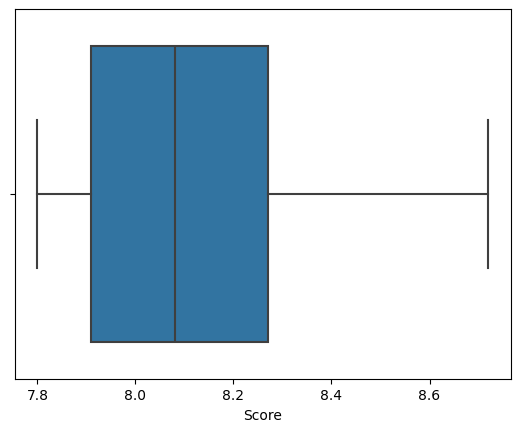

In [34]:
sns.boxplot(x=dff['Score'])

<Axes: xlabel='Popularity'>

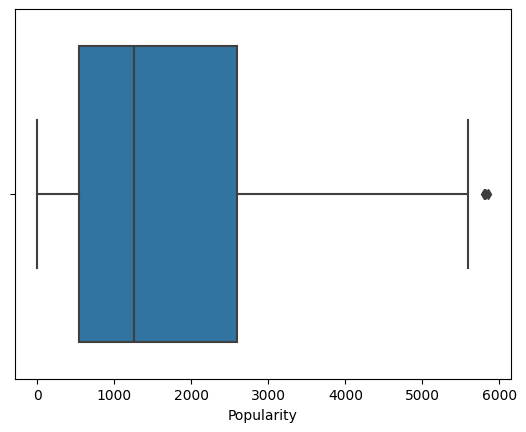

In [35]:
sns.boxplot(x=dff['Popularity'])

<Axes: xlabel='Members'>

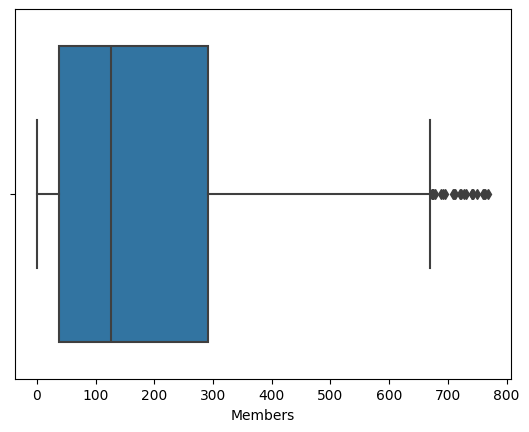

In [36]:
sns.boxplot(x=dff['Members'])

In [37]:
# Save the cleaned Data Set from outliers to use in next steps...
dff.to_csv("top_anime.csv", index=False)

In [38]:
# TODO: Continue EDA

In [12]:
plt.style.use('dark_background')

In [9]:
df.head(2)

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,Status,Aired,Producers,Licensors,Studios,Source,Genres,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024","Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",24 min. per ep.,R - 17+ (violence & profanity)


**Top 10 Animes Ranked by Score**

In [13]:
top_10_animes = df.sort_values(by='Score', ascending=False).head(10)

In [29]:
top_10_animes.isnull().sum()

Score          0
Popularity     0
Rank           0
Members        0
Description    0
Synonyms       3
Japanese       0
English        0
Type           0
Episodes       0
Status         0
Aired          0
Producers      0
Licensors      0
Studios        0
Source         0
Genres         0
Duration       0
Rating         0
dtype: int64

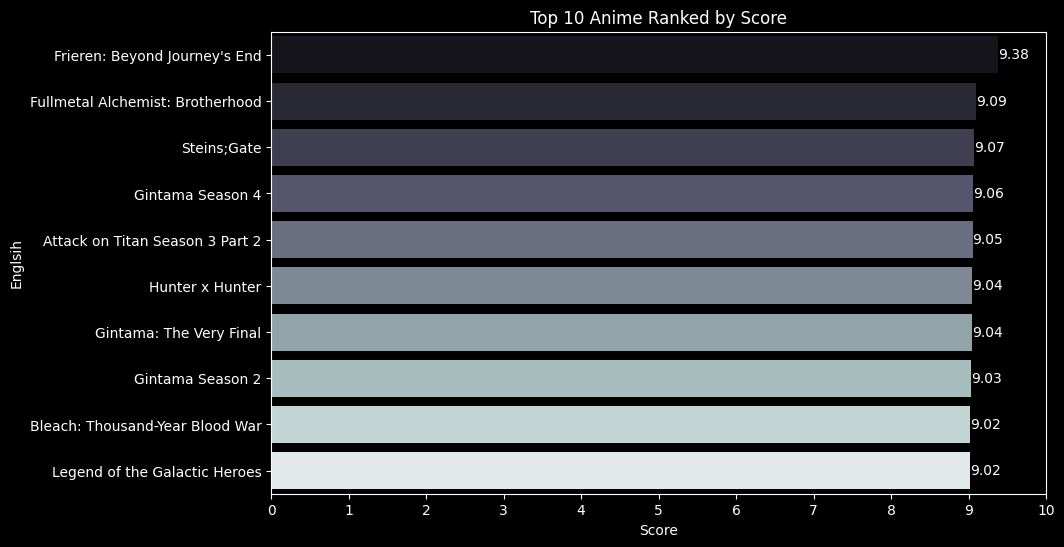

In [43]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Score', y='English', data=top_10_animes, palette='bone')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Score')
plt.xticks(range(11))
plt.ylabel('Englsih')
plt.title('Top 10 Anime Ranked by Score')
plt.show()

**Top 10 Animes by their Popularity:**

In [45]:
top_10_animes_pop = df.sort_values(by='Popularity', ascending=False).head(10)

In [46]:
# Let's check if we have null values in columns we need for plotting
top_10_animes_pop['English'].isnull().sum()

4

*We have null values in English columns, as we need it for plotting so we must deal with it first!*

In [47]:
top_10_animes_pop = top_10_animes_pop.dropna(subset=['English'])
top_10_animes_pop['English'].isnull().sum()

0

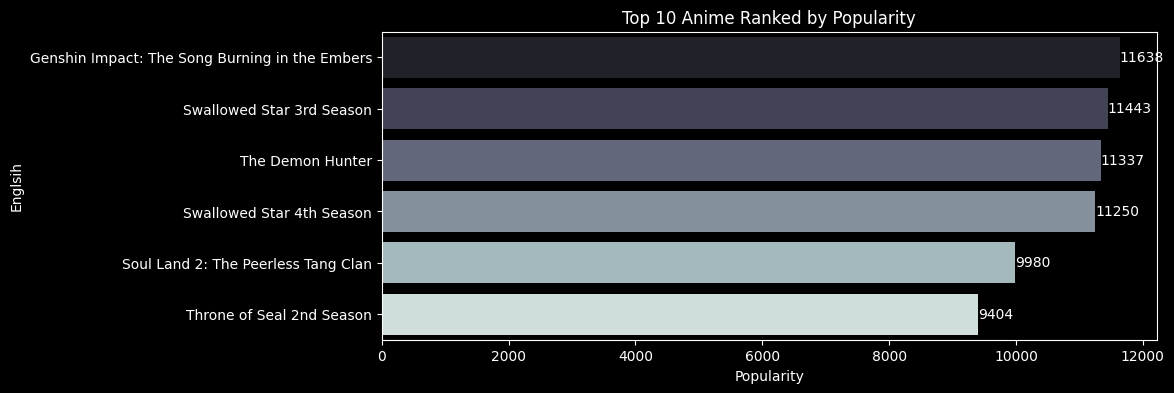

In [48]:
plt.figure(figsize=(10, 4))

ax = sns.barplot(x='Popularity', y='English', data=top_10_animes_pop, palette='bone')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xlabel('Popularity')
# plt.xticks(range())
plt.ylabel('Englsih')
plt.title('Top 10 Anime Ranked by Popularity')
plt.show()

**Conunt of Animes with respect to their Rating:**

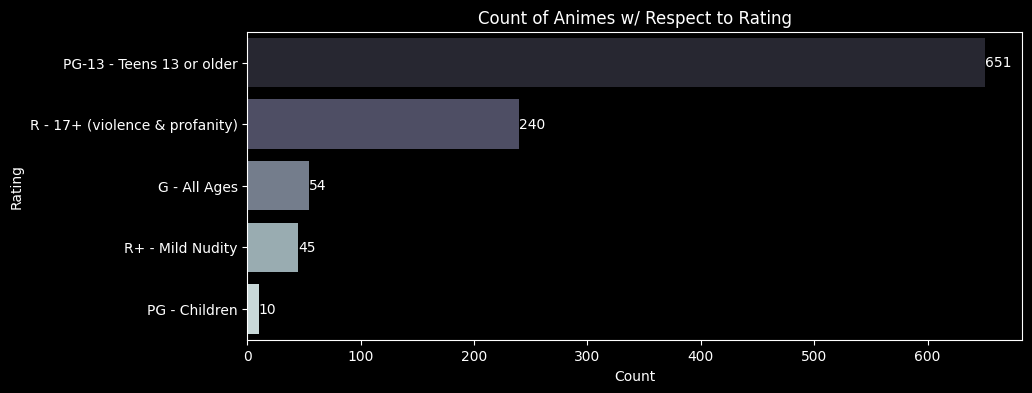

In [54]:
plt.figure(figsize=(10, 4))

ax = sns.countplot(y='Rating', data=df, palette='bone', orient='h', order=df['Rating'].value_counts().index)

for i in ax.containers:
    ax.bar_label(i)

plt.xlabel('Count')
plt.ylabel('Rating')
plt.title('Count of Animes w/ Respect to Rating')
plt.show()


In [51]:
df.head()

,Score,Popularity,Rank,Members,Description,Synonyms,Japanese,English,Type,Episodes,Status,Aired,Producers,Licensors,Studios,Source,Genres,Duration,Rating
0,9.38,284,1,710,During their decade-long quest to defeat the D...,Frieren at the Funeral,葬送のフリーレン,Frieren: Beyond Journey's End,TV,28,Finished Airing,"Sep 29, 2023 to Mar 22, 2024","Aniplex, Dentsu, Shogakukan-Shueisha Productio...","None found, add some",Madhouse,Manga,"AdventureAdventure, DramaDrama, FantasyFantasy",24 min. per ep.,PG-13 - Teens 13 or older
1,9.09,3,2,3,After a horrific alchemy experiment goes wrong...,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",鋼の錬金術師 FULLMETAL ALCHEMIST,Fullmetal Alchemist: Brotherhood,TV,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,Manga,"ActionAction, AdventureAdventure, DramaDrama, ...",24 min. per ep.,R - 17+ (violence & profanity)
2,9.07,13,3,2,Eccentric scientist Rintarou Okabe has a never...,NaN,STEINS;GATE,Steins;Gate,TV,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011","Frontier Works, Media Factory, Kadokawa Shoten...",Funimation,White Fox,Visual novel,"DramaDrama, Sci-FiSci-Fi, SuspenseSuspense",24 min. per ep.,PG-13 - Teens 13 or older
3,9.06,342,4,630,"Gintoki, Shinpachi, and Kagura return as the f...",Gintama' (2015),銀魂°,Gintama Season 4,TV,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,"ActionAction, ComedyComedy, Sci-FiSci-Fi",24 min. per ep.,PG-13 - Teens 13 or older
4,9.05,21,5,2,Seeking to restore humanity's diminishing hope...,NaN,進撃の巨人 Season3 Part.2,Attack on Titan Season 3 Part 2,TV,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019","Production I.G, Dentsu, Mainichi Broadcasting ...",Funimation,Wit Studio,Manga,"ActionAction, DramaDrama, SuspenseSuspense",23 min. per ep.,R - 17+ (violence & profanity)


Studio - Genres

In [66]:
print(df['Genres'].isnull().sum())
print(df['Studios'].isnull().sum())

229
0


In [67]:
df = df.dropna(subset=['Genres'])

In [82]:
studios_by_sources_exploded = df.groupby(by='Studios')['Source'].unique().reset_index()
studios_by_sources_exploded = studios_by_sources_exploded.explode('Source').reset_index(drop=True)
print(studios_by_sources_exploded)


          Studios        Source
0            8bit         Manga
1    A-1 Pictures         Manga
2    A-1 Pictures   Light novel
3    A-1 Pictures     Web manga
4    A-1 Pictures      Original
..            ...           ...
225         feel.   Light novel
226         feel.         Manga
227      ufotable         Manga
228      ufotable  Visual novel
229      ufotable   Light novel

[230 rows x 2 columns]


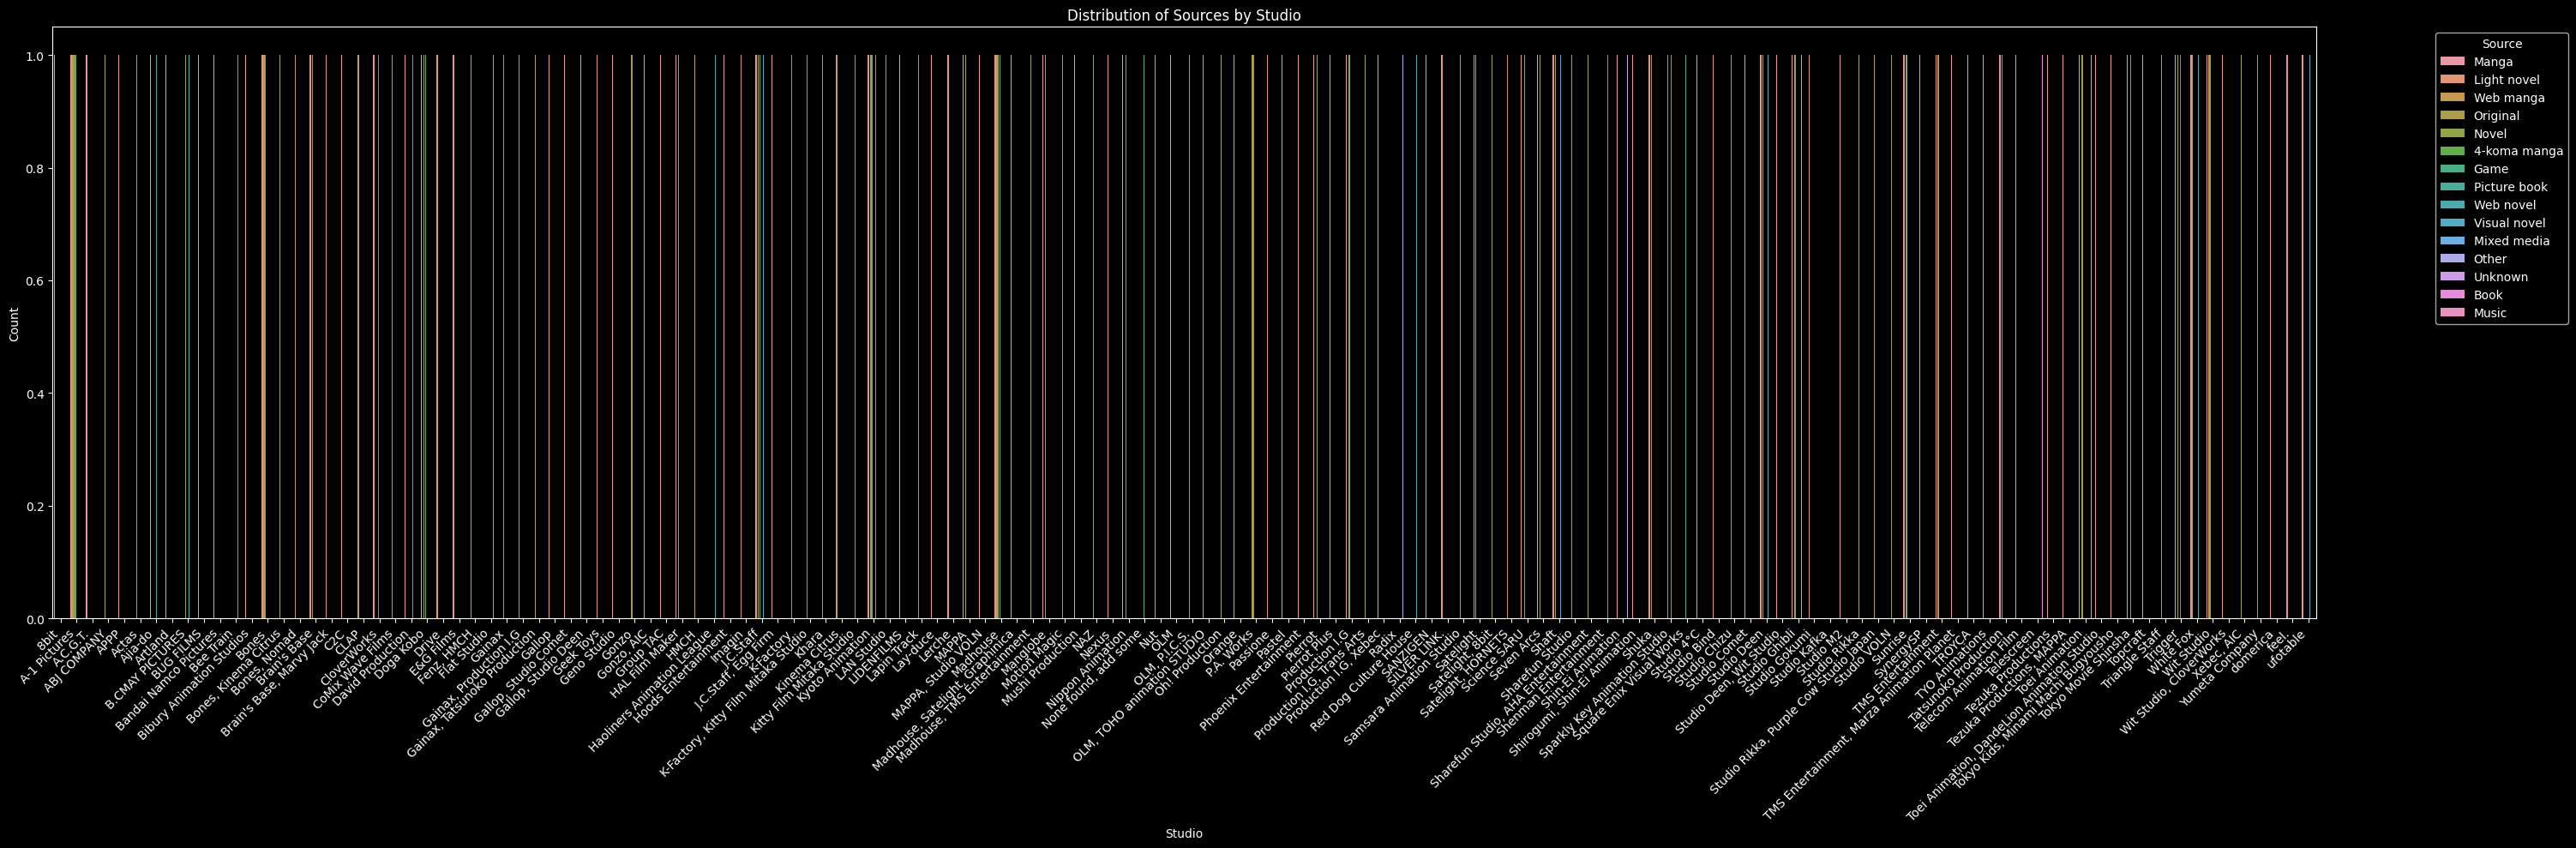

In [87]:
plt.figure(figsize=(30, 10))
sns.countplot(data=studios_by_sources_exploded, x='Studios', hue='Source')
plt.title('Distribution of Sources by Studio')
plt.xlabel('Studio')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()